In [2]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings

warnings.filterwarnings("ignore")

# 设置中文字体显示
plt.rcParams["font.sans-serif"] = ["SimHei", "Arial Unicode MS", "DejaVu Sans"]
plt.rcParams["axes.unicode_minus"] = False

# 加载数据
df = pd.read_csv("../data/train.csv")

In [3]:
# 查看数据基本信息
print("数据集基本信息：")
print(df.info())

# 查看数据描述性统计
print("\n描述性统计：")
print(df.describe())

数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18 

In [4]:
# 处理缺失值
# 对于数值型特征，使用中位数填充
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# 对于分类特征，标记为"Unknown"
categorical_columns = df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna("Unknown", inplace=True)

In [5]:
# 选择数值型列进行异常值检测，使用的异常值检测方法是 IQR法
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} 的异常值数量: {len(outliers)}")

Id 的异常值数量: 0
MSSubClass 的异常值数量: 103
LotFrontage 的异常值数量: 106
LotArea 的异常值数量: 69
OverallQual 的异常值数量: 2
OverallCond 的异常值数量: 125
YearBuilt 的异常值数量: 7
YearRemodAdd 的异常值数量: 0
MasVnrArea 的异常值数量: 98
BsmtFinSF1 的异常值数量: 7
BsmtFinSF2 的异常值数量: 167
BsmtUnfSF 的异常值数量: 29
TotalBsmtSF 的异常值数量: 61
1stFlrSF 的异常值数量: 20
2ndFlrSF 的异常值数量: 2
LowQualFinSF 的异常值数量: 26
GrLivArea 的异常值数量: 31
BsmtFullBath 的异常值数量: 1
BsmtHalfBath 的异常值数量: 82
FullBath 的异常值数量: 0
HalfBath 的异常值数量: 0
BedroomAbvGr 的异常值数量: 35
KitchenAbvGr 的异常值数量: 68
TotRmsAbvGrd 的异常值数量: 30
Fireplaces 的异常值数量: 5
GarageYrBlt 的异常值数量: 1
GarageCars 的异常值数量: 5
GarageArea 的异常值数量: 21
WoodDeckSF 的异常值数量: 32
OpenPorchSF 的异常值数量: 77
EnclosedPorch 的异常值数量: 208
3SsnPorch 的异常值数量: 24
ScreenPorch 的异常值数量: 116
PoolArea 的异常值数量: 7
MiscVal 的异常值数量: 52
MoSold 的异常值数量: 0
YrSold 的异常值数量: 0
SalePrice 的异常值数量: 61


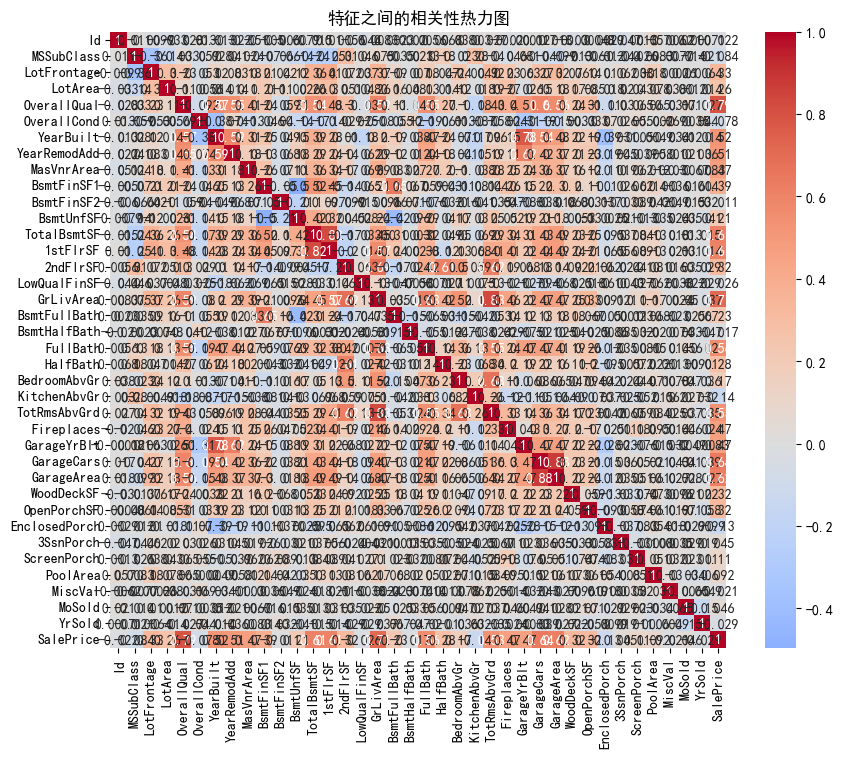

强相关特征对（|r| > 0.5）：
OverallQual 与 YearBuilt: 0.572
OverallQual 与 YearRemodAdd: 0.551
OverallQual 与 TotalBsmtSF: 0.538
OverallQual 与 GrLivArea: 0.593
OverallQual 与 FullBath: 0.551
OverallQual 与 GarageYrBlt: 0.514
OverallQual 与 GarageCars: 0.601
OverallQual 与 GarageArea: 0.562
OverallQual 与 SalePrice: 0.791
YearBuilt 与 YearRemodAdd: 0.593
YearBuilt 与 GarageYrBlt: 0.777
YearBuilt 与 GarageCars: 0.538
YearBuilt 与 SalePrice: 0.523
YearRemodAdd 与 GarageYrBlt: 0.616
YearRemodAdd 与 SalePrice: 0.507
BsmtFinSF1 与 TotalBsmtSF: 0.522
BsmtFinSF1 与 BsmtFullBath: 0.649
TotalBsmtSF 与 1stFlrSF: 0.820
TotalBsmtSF 与 SalePrice: 0.614
1stFlrSF 与 GrLivArea: 0.566
1stFlrSF 与 SalePrice: 0.606
2ndFlrSF 与 GrLivArea: 0.688
2ndFlrSF 与 HalfBath: 0.610
2ndFlrSF 与 BedroomAbvGr: 0.503
2ndFlrSF 与 TotRmsAbvGrd: 0.616
GrLivArea 与 FullBath: 0.630
GrLivArea 与 BedroomAbvGr: 0.521
GrLivArea 与 TotRmsAbvGrd: 0.825
GrLivArea 与 SalePrice: 0.709
FullBath 与 TotRmsAbvGrd: 0.555
FullBath 与 SalePrice: 0.561
BedroomAbvGr 与 TotRmsAbvGrd

In [6]:
# 只计算数值型变量的相关性
correlation_matrix = df[numeric_cols].corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, square=True)
plt.title("特征之间的相关性热力图")
plt.show()

# 找出所有 |r| > 0.5 的特征对
strong_pairs = []
for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        col1, col2 = numeric_cols[i], numeric_cols[j]
        corr = correlation_matrix.loc[col1, col2]
        if abs(corr) > 0.5:
            strong_pairs.append((col1, col2, corr))

# 显示结果
print("强相关特征对（|r| > 0.5）：")
for pair in strong_pairs:
    print(f"{pair[0]} 与 {pair[1]}: {pair[2]:.3f}")

In [7]:
# 创建标准化器
scaler = StandardScaler()

# 对 price 进行标准化（z-score 标准化）
df["price_scaled"] = scaler.fit_transform(df[["SalePrice"]])

print("标准化后的 price 前几项：")
print(df["price_scaled"].head())

标准化后的 price 前几项：
0    0.347273
1    0.007288
2    0.536154
3   -0.515281
4    0.869843
Name: price_scaled, dtype: float64


In [8]:
# 方法一：等宽分桶（Equal-width binning）
bins = [0, 150000, 300000, np.inf]
labels = ["低价（0-150K）", "中价（150K-300K）", "高价（300K以上）"]
df["price_level"] = pd.cut(df["SalePrice"], bins=bins, labels=labels)

print("价格等级分布：")
print(df["price_level"].value_counts())

价格等级分布：
price_level
中价（150K-300K）    726
低价（0-150K）       619
高价（300K以上）       115
Name: count, dtype: int64


In [9]:
# 获取 price 与其他特征的相关性排序
price_corr = correlation_matrix["SalePrice"].abs().sort_values(ascending=False)
top_3_features = price_corr[1:4]  # 排除自己

print("与 price 相关性最高的三个特征：")
print(top_3_features)

与 price 相关性最高的三个特征：
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
Name: SalePrice, dtype: float64
